In [1]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 

import numpy as np
import pandas as pd
from makeEnv import acousticEnv
from normalMode import Chinook
from wni import Corgi

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
f = 45
c_w = 1500
rho_w = 1000
c_b = 1800
rho_b = 1800
atten_b = 0.2
d = 100

world = acousticEnv()
world.pekeris(c_w, c_b, rho_w, rho_b, atten_b, d)

In [3]:
zPlot = np.array((90, 30))
rPlot = np.r_[10:6000:1000j]
sd = np.array((3, 50))

In [4]:
nm_model = Chinook(f, world)
nm_model.calculateModes_shooting()
p_nm = []
v_nm = []
p_wni = []
v_wni = []
for s in sd:
    
    p_nm.append(nm_model.calculatePressure(s, zPlot[0], rPlot))
    v_nm.append(nm_model.calculatePressure(s, zPlot[0], rPlot, isPressure = False))
    
    wni_model = Corgi(world, s, f, zPlot[0], np.max(rPlot))
    wni_model.integrateSpectrum()
    p_wni.append(wni_model.getPressure())
    v_wni.append(1j * 2 * np.pi * f * wni_model.getDisplacement())

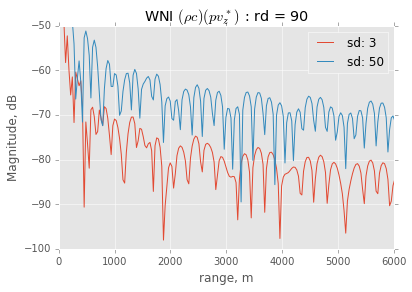

In [14]:
# Vertical Intensity comparison
_ = plt.plot(p_wni[0].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[0]).conj() * p_wni[0]))), label = 'sd: ' + str(sd[0]))
_ = plt.plot(p_wni[1].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[1]).conj() * p_wni[1]))), label = 'sd: ' + str(sd[1]))
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-100, -50)
_ = plt.title(r'WNI $(\rho c) (p v^*_z)$ :' +\
             ' rd = ' + str(zPlot[0]))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()
plt.savefig('figures/vI_rd_90')

In [6]:
for s in sd:
    
    p_nm.append(nm_model.calculatePressure(s, zPlot[1], rPlot))
    v_nm.append(nm_model.calculatePressure(s, zPlot[1], rPlot, isPressure = False))
    
    wni_model = Corgi(world, s, f, zPlot[1], np.max(rPlot))
    wni_model.integrateSpectrum()
    p_wni.append(wni_model.getPressure())
    v_wni.append(1j * 2 * np.pi * f * wni_model.getDisplacement())

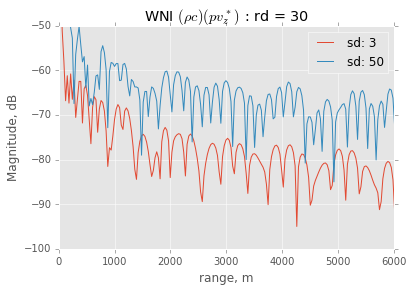

In [13]:
# Vertical Intensity comparison
_ = plt.plot(p_wni[2].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[2]).conj() * p_wni[2]))), label = 'sd: ' + str(sd[0]))
_ = plt.plot(p_wni[3].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[3]).conj() * p_wni[3]))), label = 'sd: ' + str(sd[1]))
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-100, -50)
_ = plt.title(r'WNI $(\rho c) (p v^*_z)$ :' +\
             ' rd = ' + str(zPlot[1]))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

In [8]:
vI = np.squeeze(np.array([0.5 * np.real(np.array(v).conj() * p) for v, p in zip(v_wni, p_wni)]))
vI *= rho_w * c_w
depthDiff = np.vstack(((vI[0,:] - vI[2,:]), (vI[1,:] - vI[3,:])))

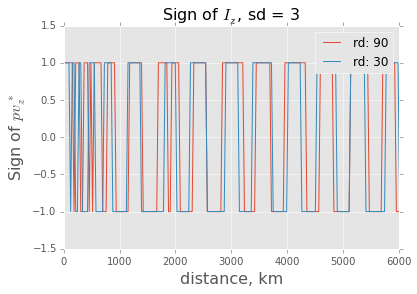

In [9]:
_ = plt.plot(p_wni[0].index, np.sign(vI[0,:].T), label = 'rd: ' + str(zPlot[0]))
_ = plt.plot(p_wni[0].index, np.sign(vI[2,:].T), label = 'rd: ' + str(zPlot[1]))
_ = plt.ylabel(r'Sign of $p v_z^*$', fontsize = 16)
_ = plt.xlabel('distance, km', fontsize = 16)
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-1.5, 1.5)
_ = plt.title('Sign of $I_z$, sd = ' + str(sd[0]), fontsize = 16)
_ = plt.legend()
plt.savefig('figures/signChanges_3')

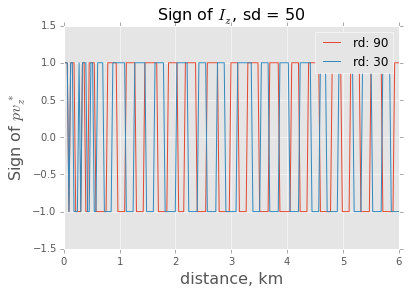

In [10]:
_ = plt.plot(p_wni[0].index / 1e3, np.sign(vI[1,:].T), label = 'rd: ' + str(zPlot[0]))
_ = plt.plot(p_wni[0].index / 1e3, np.sign(vI[3,:].T), label = 'rd: ' + str(zPlot[1]))
_ = plt.ylabel(r'Sign of $p v_z^*$', fontsize = 16)
_ = plt.xlabel('distance, km', fontsize = 16)

_ = plt.xlim([0, np.max(rPlot / 1e3)])
_ = plt.ylim(-1.5, 1.5)
_ = plt.title('Sign of $I_z$, sd = ' + str(sd[1]), fontsize = 16)
_ = plt.legend()
plt.savefig('figures/signChanges_50')

In [11]:
vI_nm = np.squeeze(np.array([0.5 * np.real(np.array(v).conj() * p) for v, p in zip(v_nm, p_nm)]))
vI_nm *= rho_w * c_w

cycleLoc = np.diff(np.sign(vI_nm))
cycleDistance_sd_3 = p_nm[0].index[cycleLoc[0] != 0]
cycleDistance_sd_50 = p_nm[1].index[cycleLoc[1] != 0]

# _ = plt.plot(p_wni[0].index, np.sign(vI[1,:].T), label = 'rd: ' + str(zPlot[0]))
# _ = plt.plot(p_wni[0].index, np.sign(vI[0,:].T), label = 'rd: ' + str(zPlot[0]))


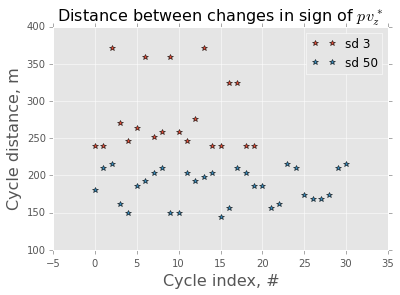

In [12]:
_ = plt.plot(np.diff(np.array(cycleDistance_sd_3)),\
             '*', label = 'sd ' + str(sd[0]))
_ = plt.plot(np.diff(np.array(cycleDistance_sd_50)),\
             '*', label = 'sd ' + str(sd[1]))
_ = plt.ylabel('Cycle distance, m', fontsize = 16)
_ = plt.xlabel('Cycle index, #', fontsize = 16)
_ = plt.xlim(-5, 35)
_ = plt.title(r'Distance between changes in sign of $pv_z^*$', fontsize = 16)
_ = plt.legend()
plt.savefig('figures/cycleDistance')